## Correlation based Distance

상관계수는 선형적 상호의존성의 유용한 척도다. 일단 상관계수 행렬의 잡음과 주음이 제거되면 시스템에 대한 중요한 구조 정보를 보일 수 있다. 예를 들어서, 상호 연관성이 매우 높은 유가증권의 군집을 식별하고자 상관계수를 사용할 수 있다. 그러나 상관계수를 사용하기 전에 기술적 문제를 해결해야 한다. 상관계수는 비음성과 삼각 부등식 조건을 충족시키지 못하기 때문에 척도가 되지 못한다. 거리 척도는 집합에 대한 직관적인 위상관계를 유도하기 때문에 중요하다. 이러한 직관적 위상관계 없이 상호 의존성의 비거리적 측정을 비교하는 것은 다소 일관성 없는 결과를 초래할 수 있다. 예를 들어서 상관계수 (0.9, 1.0)의 차이는 (0.1, 0.2)의 차이와 같다. 물론 전자가 상호의존성의 관점에서 더 큰 차이를 가질 것이다.

크기 $T$의 랜덤 벡터 $X$와 $Y$와 상관계수 추정치 $\rho[X,Y]$를 고려하자. 상관계수는 단지 $\sigma_{X,Y} = \rho(X, Y)\sigma_X\sigma_Y$를 만족하면 되는데 여기서 $\sigma_{X,Y}$는 두 벡터의 공분산이고, $\sigma$는 표준 편차다. pearson correlation은 이들 조건을 만족하는 여러 상관계수 추정치 중 하나다. 이때, $d_\rho(X,Y) = \sqrt{\frac{1}{2} (1 - \rho(X, Y))}$는 거리 척도다.

In [1]:
from FinancialMachineLearning.data_loader.tickers import WikipediaStockListing
ticker = WikipediaStockListing()

In [2]:
ticker_list = ticker.sp100()['Symbol'].tolist()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from curl_cffi import requests
import warnings

warnings.filterwarnings('ignore')

START_DATE = '2020-01-01'
END_DATE = pd.to_datetime('today')

session = requests.Session(
    impersonate = 'chrome'
)

data = yf.download(
    ticker_list,
    start = START_DATE,
    progress = True,
    interval = '1d',
    auto_adjust = True,
    session = session,
    multi_level_index = False
)['Close']

[*********************100%***********************]  101 of 101 completed


In [9]:
data = data.resample('W-FRI').last().dropna(axis = 1)
ret = data.pct_change().dropna()

<Axes: xlabel='Ticker', ylabel='Ticker'>

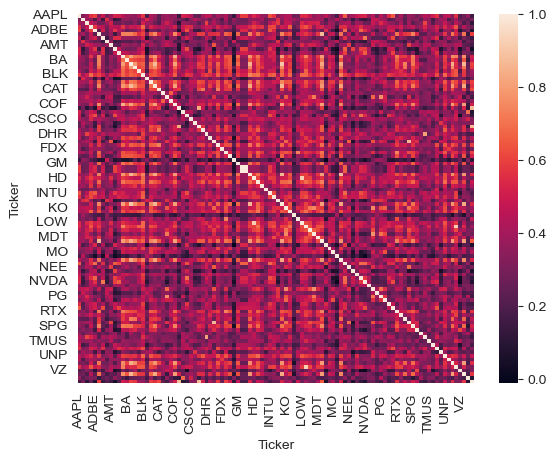

In [12]:
sns.heatmap(ret.corr())

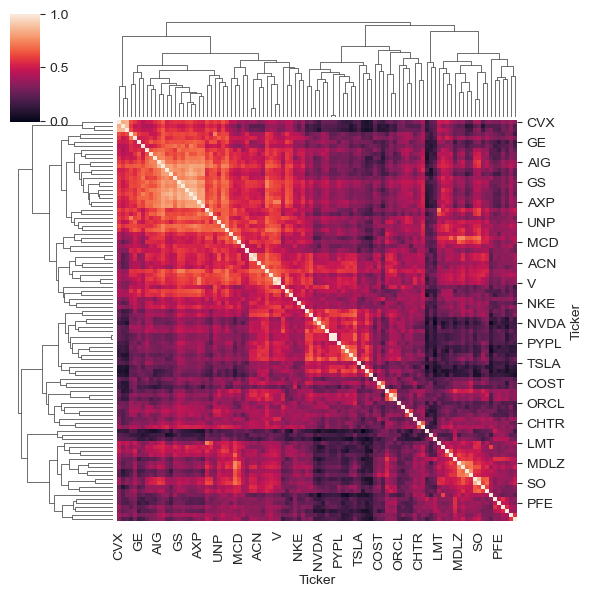

In [14]:
sns.clustermap(ret.corr(), figsize=(6,6))

이 명제를 증명하고자 첫째, 두 벡터의 유클리드 거리가 $d[X,Y] = \sqrt{\sum_{t=1}^T(X_t - Y_t)^2}$이라고 고려하자. 툴째, 이들 벡터를 $x = \frac{X-\bar{X}}{\sigma[X]}, y = \frac{Y-\bar{Y}}{\sigma[Y]}$로 표준화하자. 여기서 $\bar{X}$는 $X$의 평균, $\bar{Y}$는 $Y$의 평균이다. 결국 $\rho[x,y] = \rho[X,Y]$이다. 셋째, 유클리드 거리 $d[X,Y]$를 다음과 같이 도출한다.

$$
\begin{align}
d[x,y] =& \sqrt{\sum_{t=1}^T (x_t - y_t)^2} \\
=& \sqrt{\sum_{t=1}^T x_t^2 + \sum_{t=1}^T y_t^2 -2\sum_{t=1}^T x_ty_t} = \sqrt{T + T - 2T\sigma[x,y]} \\
=& \sqrt{2T \left( 1 - \rho[x,y]\right)} = \sqrt{4T}d_\rho[X,Y]
\end{align}
$$

거리 척도 $d[x,y]$는 $\rho[x,y] \in [-1, 1]$ 이므로 정규화 특성 $d_\rho[X,Y] \in [0,1]$을 갖는다. 또 다른 특성은 절대값에 상관없이 음의 상관계수를 갖는 두 랜덤 변수가 양의 상관계수를 갖는 두 랜덤 변수보다 더 멀게 된다는 것이다. 이 특성은 여러 응용에서 합리적이다. 예를 들어, long-only 포트폴리오를 구축하고자 할 때, 음의 상관계수를 갖는 보유 종목들은 단지 위험만을 상쇄하므로 분산 목적을 위해 다르게 취급해야만 한다. 다른 예로서, long-short portoflio를 들 수 있는데, 종종 매우 큰 음의 상관계수를 가진 증권을 유사하게 고려한다. 이 경우 대안적인 정규화된 상관계수 기반의 거리 척도 $d_{|\rho|}[X,Y] = \sqrt{1-|\rho[X,Y]|}$를 정의할 수 있다.

마찬가지로 $d_{|\rho|}[X,Y]$가 $\frac{Z}{2Z}$ 비율에 대한 진정한 척도로 축약되는 것을 증명할 수 있다. 이를 위해서 $y = \frac{Y-\bar{Y}}{\sigma[Y] }\text{sgn}[\rho[X,Y]]$를 재정의한다. 여기서 $\text{sgn}[\cdot]$는 부호 연산자이고, $0 \leq \rho[x,y] = |[X,Y]|$가 된다. 그러므로, 이전과 사용한 동일한 논리를 따라서 다음을 보일 수 있다.

$$d[x,y] = \sqrt{2T \left( 1 - \rho[x,y]\right)} = \sqrt{2T}d_{|\rho|} [X,Y]$$

In [16]:
from FinancialMachineLearning.metrics.distance import corr_based_distance

dist = corr_based_distance(ret)

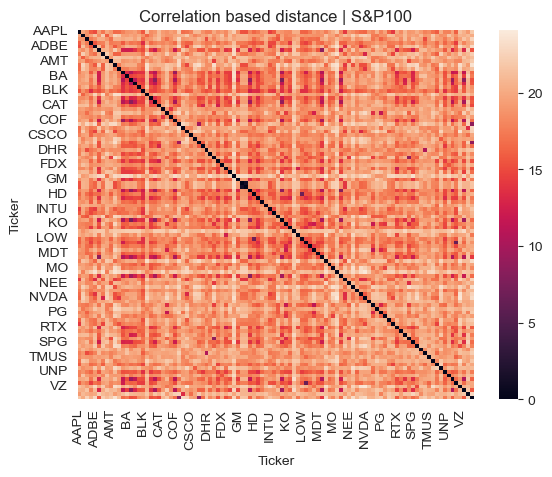

In [17]:
sns.heatmap(dist, annot = False)
plt.title('Correlation based distance | S&P100')
plt.show()

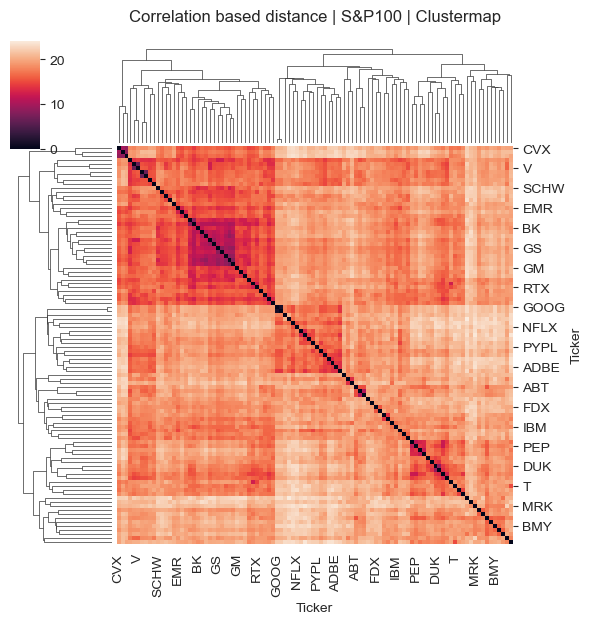

In [18]:
clustermap = sns.clustermap(dist, annot = False, figsize = (6, 6))
clustermap.ax_heatmap.set_title('Correlation based distance | S&P100 | Clustermap', pad = 90)
#plt.tight_layout()
plt.show()